## Imports
All of the IceVision components can be easily imported with a single line.


In [1]:
from icevision.all import *

### Creating model 1


In [2]:
# Just change the value of selection to try another model

extra_args = {}
model_type1 = models.mmdet.retinanet
backbone1 = model_type1.backbones.resnet50_fpn_1x



Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

In [3]:
# Instantiate the mdoel
# if mmdet.retinanet is selected above there will be some warnings but still works well
model1 = model_type1.model(backbone=backbone1(pretrained=True), num_classes=91, **extra_args)


/home/ubuntu/miniconda3/lib/python3.8/site-packages/mmcv/cnn/utils/weight_init.py:118: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  warnings.warn(


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([810, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([810]).


### Creating model 2


In [4]:
# Just change the value of selection to try another model

extra_args = {}
model_type2 = models.mmdet.retinanet
backbone2 = model_type2.backbones.resnet50_fpn_1x



Now it is just a one-liner to instantiate the model. If you want to try another *option*, just edit the line at the top of the previous cell.

In [5]:
# Instantiate the mdoel
# if mmdet.retinanet is selected above there will be some warnings but still works well
model2 = model_type2.model(backbone=backbone2(pretrained=True), num_classes=91, **extra_args)


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([810, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([810]).


## Load Models

In [6]:
PATH = 'model-person.mm'
model1.load_state_dict(torch.load(PATH))
model1.eval()

PATH = 'model-car.mm'
model2.load_state_dict(torch.load(PATH))
model2.eval()

print('Done!')


Done!


### Prediction



Load dataset and select image

In [7]:
dataset_dir = './coco-2017-car'
annot = dataset_dir + '/train/labels.json'
img_dir = dataset_dir  + '/train/data'
# COCO parser: provided out-of-the-box
parser = parsers.COCOBBoxParser(annotations_filepath=annot, img_dir=img_dir)
infer_records, valid_records = parser.parse(RandomSplitter([1.0, 0.0]))

INFO     - Autofixing records | icevision.parsers.parser:parse:136


In [8]:
image_id = 40


image_size = 384
infer_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])
infer_ds = Dataset(infer_records[image_id:image_id+1], infer_tfms)




model1 prediction:


bboxes1:
[<BBox (xmin:216.55322265625, ymin:102.69599914550781, xmax:333.96014404296875, ymax:330.15673828125)>, <BBox (xmin:132.63232421875, ymin:111.99862670898438, xmax:214.35662841796875, ymax:270.7654113769531)>, <BBox (xmin:121.70272064208984, ymin:189.11085510253906, xmax:173.77743530273438, ymax:261.51165771484375)>, <BBox (xmin:75.66905212402344, ymin:206.47264099121094, xmax:116.45750427246094, ymax:237.5677947998047)>]
scores1:
[    0.83288     0.77413     0.53064     0.57614]
labels1:
['person', 'person', 'person', 'car']


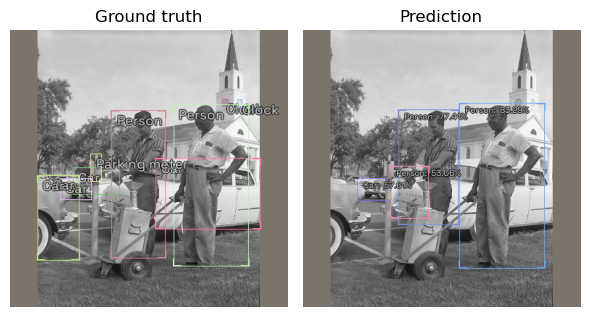

In [9]:
# inference model1 (person)
infer_dl1 = model_type1.infer_dl(infer_ds, batch_size=1, shuffle=False)
preds1 = model_type1.predict_from_dl(model1, infer_dl1, keep_images=True)


for x in preds1[0].pred.detection.components:
    if 'ScoresRecordComponent' in str(x):
        scores1 = x.scores
        print('scores1:')
        print(scores1)
    if 'InstancesLabelsRecordComponent' in str(x):
        labels1 = x.labels
        print('labels1:')
        print(labels1)
    if 'BBoxesRecordComponen' in str(x):
        bboxes1 = x.bboxes
        print('bboxes1:')
        print(bboxes1)
        
        
show_preds(preds=preds1[0:1])


Model2 prediction:


scores2:
[    0.70281     0.69107     0.70395     0.54723]
labels2:
['person', 'person', 'car', 'car']
bboxes2:
[<BBox (xmin:131.874755859375, ymin:109.5567626953125, xmax:216.61627197265625, ymax:265.646240234375)>, <BBox (xmin:210.13604736328125, ymin:99.11778259277344, xmax:334.92816162109375, ymax:328.82391357421875)>, <BBox (xmin:36.857521057128906, ymin:204.7186279296875, xmax:89.68425750732422, ymax:303.901611328125)>, <BBox (xmin:78.11895751953125, ymin:206.10989379882812, xmax:113.56576538085938, ymax:237.23779296875)>]


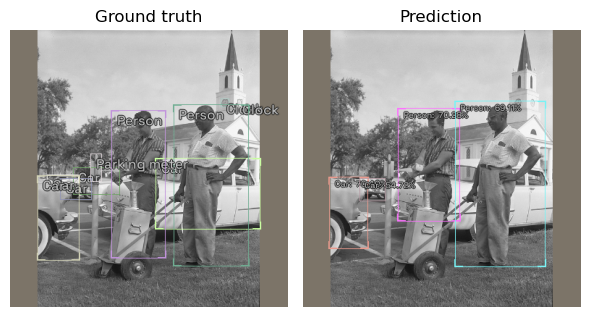

In [10]:
# inference model2 (car)
infer_dl2 = model_type2.infer_dl(infer_ds, batch_size=1, shuffle=False)
preds2 = model_type2.predict_from_dl(model2, infer_dl2, keep_images=True)


for x in preds2[0].pred.detection.components:
    if 'ScoresRecordComponent' in str(x):
        scores2 = x.scores
        print('scores2:')
        print(scores2)
    if 'InstancesLabelsRecordComponent' in str(x):
        print('labels2:')
        labels2 = x.labels
        print(labels2)
    if 'BBoxesRecordComponen' in str(x):
        bboxes2 = x.bboxes
        print('bboxes2:')
        print(bboxes2)
        
        
show_preds(preds=preds2[0:1])


In [11]:
def overlap_percent(l1, r1, l2, r2):
    x = 0
    y = 1

    x_dist = (min(r1[x], r2[x]) -
              max(l1[x], l2[x]))
 
    y_dist = (min(r1[y], r2[y]) -
              max(l1[y], l2[y]))
    areaI = 0
    if x_dist > 0 and y_dist > 0:
        areaI = x_dist * y_dist
        
    area1 = abs( (l1[0]-r1[0])*(l1[1]-r1[1]) )
    overlap = areaI / area1
 
    return overlap
 

In [16]:
for i in range(len(labels1)):
    for j in range(len(labels2)):
        if labels1[i] == 'person' and labels2[j] == 'car':
            bbox1 = bboxes1[i]
            bbox2 = bboxes1[j]
            l1 = [bbox1.xmin,bbox1.ymin]
            r1 = [bbox1.xmax,bbox1.ymax]
            l2 = [bbox2.xmin,bbox2.ymin]
            r2 = [bbox2.xmax,bbox2.ymax]
         
            print("i_person, j_car: ", i,j)
#             print(bbox1)
#             print(bbox2)
            print('overlap:', overlap_percent(l1, r1, l2, r2))
            print('')

i_person, j_car:  0 2
overlap: 0.0

i_person, j_car:  0 3
overlap: 0.0

i_person, j_car:  1 2
overlap: 0.2295888

i_person, j_car:  1 3
overlap: 0.0

i_person, j_car:  2 2
overlap: 1.0

i_person, j_car:  2 3
overlap: 0.0

